# Mathematical exercises

**Exercise 1** (3 points): Problem 4.10 from the PRML textbook.

**Exercise 2** (3 points): Problem 4.16 from the PRML textbook.


# Coding exercises

In the exercises below, we will practice using logistic regression for classification, starting with some low-dimensional synthetic data, then moving on to image classification with real data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'x2')

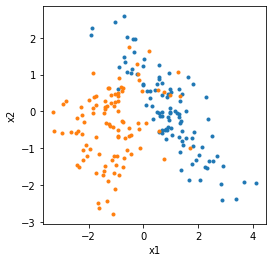

In [2]:
# Make up some two-dimensional data:
nA = 100
muA = np.array([1., 0])
sigA = np.array([[1,-0.8],[-0.8,1]])
xA = np.random.multivariate_normal(muA, sigA, nA)
nB = 100
muB = np.array([-1., -0.5])
sigB = np.array([[1,0.3],[0.3,1]])
xB = np.random.multivariate_normal(muB, sigB, nB)

# Reformat the data:
X = np.vstack((xA, xB))  # X should be n_samples by n_variables, where n_samples=nA+nB
y = np.append(np.zeros(nA), np.ones(nB))  # y should have length n_samples

# Plot the data:
plt.figure(figsize=(4,4))
plt.plot(xA[:,0], xA[:,1], '.')
plt.plot(xB[:,0], xB[:,1], '.')
plt.xlabel('x1')
plt.ylabel('x2')

## Logistic regression with simulated data

**Exercise 1** (5 points): Fit a logistic regression classifier to the synthetic data from above using `LogisticRegression` from the `sklearn` library. Alternatively, you can use `LogisticRegressionCV`, which includes L2 regularization of the weights, with built-in cross-validation to determine the regularization parameter. Report the classification accuracy and plot the result as in the previous exercise.

In [7]:
from sklearn.linear_model import LogisticRegression

## Solution ##
clf = LogisticRegression().fit(X, y)

clf.score(X,y)


0.91

## Logistic regression on MNIST

The MNIST dataset is an extremely common dataset for testing algorithms in machine learning. The dataset consists of a large number of handwritten images, where the images are represented by one-dimensional arrays, where each component of the vector represents the grayscale intensity of one image pixel. The images are 28-by-28 pixels, flattened into arrays of length $784=28^2$. The image labels are integers from 0 to 9, representing the identity of each handwritten digit. Below, we will train a classifier with logistic regression to take one of the images as input and predict the identity of the that image.

Note that, because of the large dimension $M=784$ of the data, logistic regression is a better choice than the generative classification approaches implemented above (LDA and QDA). While logistic regression requires us to fit $~M$ parameters, the generative approaches would require $~M^2$ parameters.

In [6]:
from sklearn.datasets import fetch_openml

# Import the data:
images0, labels0 = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
labels0 = [int(label) for label in labels0]  # Convert labels from strings to integers

# Look at the labels:
print(labels0[:20])

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9]


(70000, 784) (70000,)


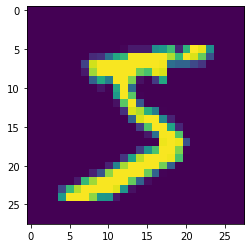

In [7]:
# The size of the full dataset:
print(np.shape(images0), np.shape(labels0)) 

# To speed things up, we'll just use a fraction of the data (feel free to use more if you like):
n_samples = 5000  
images = images0[:n_samples,:]
labels = labels0[:n_samples]

# Keep some separate data for testing:
images_test = images0[n_samples:2*n_samples,:]
labels_test = labels0[n_samples:2*n_samples]

# To show an example image, reshape the length 784 vector of pixel intensities into a 28x28 matrix:
plt.imshow(np.reshape(images[0,:], (28,28)))

In class, we discussed logistic regression with $K\geq 2$ classes. The probability that an input $\vec{x}$ belongs to class $C_k$ is given by the softmax function:
$$
p(C_k | \vec{x}) = y_k 
= \frac{\exp(\vec{w}_k \cdot \vec{\phi}(\vec{x}))}{\sum_j \exp(\vec{w}_j \cdot \vec{\phi}(\vec{x}))},
$$
and the target label $\vec{t}_n$ for input $\vec{x}_n$ is given by a one-hot vector, i.e. a vector with 1 in the $k$th entry (if the image belongs to class $C_k$) and zeros elsewhere. We showed that the "cross-entropy" error to be minimized is given by
$$
E(\vec{w}_1, \ldots, \vec{w}_K) = -\sum_{n=1}^N \sum_{k=1}^K t_{nk} \ln y_k(\vec{x}_n).
$$
Taking the derivative of this error with respect to $\vec{w}_i$ gave
$$
\frac{\partial E}{\partial \vec{w}_i} = 
-\sum_n \sum_k t_{nk} [\delta_{ki} - y_i(\vec{x}_n)] \vec{\phi}(\vec{x}_n).
$$

**Exercise 2** (5 points): In this exercise we will use the above expressions to implement logistic regression from scratch using only basic Numpy functions. In this exercise, no built-in functions performing logistic regression may be used. First, create one-hot target vectors from the image labels. Next, initialize the weights $\vec{w}_k$ randomly and use the above expressions to update the weights with gradient descent (or, if you prefer, stochastic gradient descent). You will have to use trial and error to choose a learning rate that is small enough to avoid diverging $\vec{w}_k$ but large enough to successfully train in a reasonable number of steps. At each iteration of gradient descent, record the error, then make a plot that shows the error decreasing during training. Once the error has decreased to a small value, freeze the weights, then compute and report the percentage of correct classifications for the images in the testing set. You should be able to obtain testing accuracy of around 70-90%.

Note (Optional): If you're feeling fancy, feel free to try implementing the iterative reweighted least squares algorithm described in Section 4.3.3 of PRML. This algorithm uses second-derivative information in addition to the first derivative shown above. This means that the algorithm should converge in a smaller number of steps than gradient descent, though each step will be more expensive to compute. Another (also optional) thing to try if you're feeling fancy: Include an L2 regularization term for the weights in the error defined above, and see whether this leads to improved performance compared with the model without regularization.

In [2]:
## Solution ##



**Exercise 3** (3 points): Repeat the exercise above, now doing things the easy way. Use `LogisticRegression` from the `sklearn` library to perform logistic regression on the MNIST data, then report the percentage of correct classifications using the held-out testing data. If you're feeling fancy (optional) try using L1 and/or L2 regularization or any other tricks you can think of to try to boost the final testing performance.

In [3]:
from sklearn.linear_model import LogisticRegression

## Solution ##

